# Using supervised machine learning models to  predict bioactivity response of drugs to Covid-19 virus

## Importing neccesary modules

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns

## Data Exploration 

In [2]:
url="https://raw.githubusercontent.com/Dinesh-Adhithya-H/AI-and-its-scientific-applications/master/file.csv"
file=pd.read_csv(url,delimiter=";")

In [3]:
file=file.dropna() 

In [4]:
file.head()

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,...,Structure Type,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles
16,CHEMBL27193,DILEVALOL,DILEVALOL,Small molecule,4,328.41,10,34,2.14,95.58,...,MOL,0,24,5,5,0,328.1787,BASE,C19H24N2O3,C[C@H](CCc1ccccc1)NC[C@H](O)c1ccc(O)c(C(N)=O)c1
17,CHEMBL1096435,Ro-281675,Ro-0281675,Small molecule,0,378.52,13,84,3.85,76.13,...,MOL,-1,25,5,1,0,378.1072,NEUTRAL,C18H22N2O3S2,CS(=O)(=O)c1ccc([C@@H](CC2CCCC2)C(=O)Nc2nccs2)cc1
18,CHEMBL1078983,AZD-2014,AZD-2014,Small molecule,0,465.55,19,33,2.64,93.07,...,MOL,-1,34,9,1,0,465.2376,NEUTRAL,C25H31N5O4,COc1ccc(-c2ccc3c(N4CCOCC4)nc(N4C[C@H](C)O[C@H]...
32,CHEMBL567303,PALOSURAN,ACT-058362|PALOSURAN,Small molecule,2,418.54,4,7,3.73,77.49,...,MOL,0,31,6,3,0,418.2369,NEUTRAL,C25H30N4O2,Cc1cc(NC(=O)NCCN2CCC(O)(Cc3ccccc3)CC2)c2ccccc2n1
35,CHEMBL149930,MEGLITINIDE,MEGLITINIDE|Meglitinide,Small molecule,0,333.77,5,12,3.02,75.63,...,MOL,0,23,5,2,0,333.0768,ACID,C17H16ClNO4,COc1ccc(Cl)cc1C(=O)NCCc1ccc(C(=O)O)cc1


## Data processing 

In [5]:
x=file.drop(["ChEMBL ID","Name","Synonyms","Type","Molecular Species","Molecular Formula","Smiles","Structure Type","#Rotatable Bonds"],axis=1)
x.loc[x['Passes Ro3']=="N", 'Passes Ro3'] = 0
x.loc[x['Passes Ro3']=="Y", 'Passes Ro3'] = 1
x=x[x["CX BpKa"] !="None"]
x=x[x["CX ApKa"] !="None"]
x.head()

,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,PSA,HBA,HBD,#RO5 Violations,Passes Ro3,...,CX BpKa,CX LogP,CX LogD,Aromatic Rings,Inorganic Flag,Heavy Atoms,HBA Lipinski,HBD Lipinski,#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic)
16,4,328.41,10,34,2.14,95.58,4,4,0,0,...,9.80,1.89,1.26,2,0,24,5,5,0,328.1787
32,2,418.54,4,7,3.73,77.49,4,3,0,0,...,7.91,2.66,2.03,3,0,31,6,3,0,418.2369
40,0,133.17,3,8,-0.27,49.33,3,2,0,1,...,7.70,-2.68,-2.84,0,0,8,3,2,0,133.0197
48,0,297.79,2,10,1.13,70.05,4,3,0,0,...,9.14,0.84,-0.89,2,-1,19,5,3,0,261.1477
84,0,408.89,6,17,4.21,85.17,5,2,0,0,...,6.21,3.74,3.72,3,-1,29,6,2,0,408.1353


In [6]:
x.columns

Index(['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'PSA', 'HBA', 'HBD', '#RO5 Violations', 'Passes Ro3', 'QED Weighted',
       'CX ApKa', 'CX BpKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Inorganic Flag', 'Heavy Atoms', 'HBA Lipinski', 'HBD Lipinski',
       '#RO5 Violations (Lipinski)', 'Molecular Weight (Monoisotopic)'],
      dtype='object')

In [7]:
y=x["Bioactivities"]

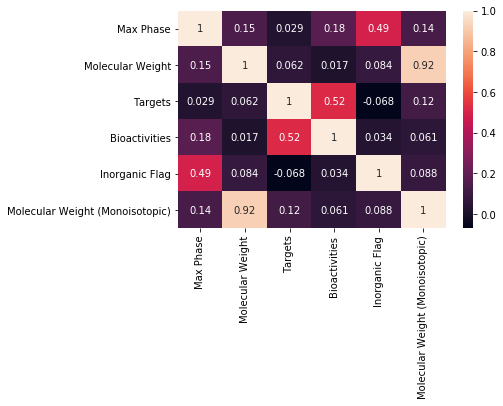

In [8]:
correlation_matrix = x.corr()
sns.heatmap(data=correlation_matrix, annot=True)

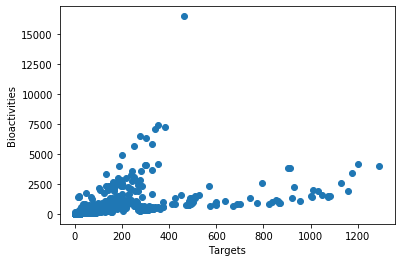

In [9]:
plt.scatter(np.array(x['Targets']),np.array(x['Bioactivities']))
plt.xlabel("Targets")
plt.ylabel("Bioactivities")
plt.show()

## Removing Bioactivities column alone

In [10]:
x=x[['Max Phase', 'Molecular Weight', 'Targets', 'AlogP',
       'PSA', 'HBA', 'HBD', '#RO5 Violations', 'Passes Ro3', 'QED Weighted',
       'CX ApKa', 'CX BpKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Inorganic Flag', 'Heavy Atoms', 'HBA Lipinski', 'HBD Lipinski',
       '#RO5 Violations (Lipinski)', 'Molecular Weight (Monoisotopic)']]

In [11]:
x=np.array(x)
y=np.array(y)

## Data is converted from string to float datatype 

In [12]:
for i in range(len(x)):
    for j in range(len(x[i])):
        if x[i][j]!="None":
            x[i][j]=float(x[i][j])
        else: 
            print(j)

##  Data scaling using MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(x)

## Machine learning model : LinearRegression

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [15]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression().fit(x_train,y_train)
np.mean((reg.predict(x_test) - y_test)**2)

1022035.2037586105

## Evaluation metrics for model developed

In [16]:
from sklearn.metrics import r2_score

In [17]:
yhat=reg.predict(x_test)
r2lr=r2_score(y_test, yhat)

# Best score for r2 is 1.0 and worst is large negative no. , linear regression model performs decently at 0.24 

## Machine learning model : SupportVectorMachine

In [19]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
np.mean((clf.predict(x_test) - y_test)**2)

1602237.1752873564

In [20]:
yhat=clf.predict(x_test)
r2svm=r2_score(y_test, yhat)

## SVM predicts with r2_score at -1.07

## Machine learning model : K nearest neighbours

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier().fit(x_test,y_test)
yhat=knn.predict(x_test)
np.mean((reg.predict(x_test) - y_test)**2)

1022035.2037586105

In [22]:
r2knn=r2_score(y_test, yhat)

## K Nearest Neighbour performs at 0.04

## Machine learning model : SGDClassifier

In [24]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=5, tol=None)
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)

In [25]:
r2sgd=r2_score(y_test, y_pred)

## Machine learning model : DecisionTreeClassifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)
Y_pred = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [27]:
r2dtc=r2_score(y_test,Y_pred)

In [28]:
np.mean((decision_tree.predict(x_test) - y_test)**2)

1131512.1436781608

# Results

In [29]:
results = pd.DataFrame({
    'Model': ["Linear Regression",'Support Vector Machines', 'KNN',   
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [r2lr,r2svm,r2knn,r2sgd,r2dtc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.272943,Linear Regression
0.195064,Decision Tree
-0.027908,KNN
-0.086003,Stochastic Gradient Decent
-0.139801,Support Vector Machines
